# Exploratory Data Analysis

Minimal, repeatable EDA built from `scripts/eda.py`. Run cells top-to-bottom to generate summary tables and plots under `../reports/eda`.


In [8]:
from __future__ import annotations

from pathlib import Path
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import Image, display

# Ensure the project root is on the Python path so we can import from scripts/
ROOT = Path("..").resolve()
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))

from scripts.data_processing import load_and_clean_data
from scripts.eda import plot_charges_relationships, plot_distributions, run_basic_eda, summarize_dataframe

plt.style.use("seaborn-v0_8-whitegrid")
sns.set_theme(style="whitegrid")


In [9]:
DATA_PATH = ROOT / "data/insurance.txt"  # adjust if using a different file
OUT_DIR = ROOT / "data/eda"
OUT_DIR.mkdir(parents=True, exist_ok=True)

sep = None  # auto-detect delimiter; override if needed, e.g., sep="," or sep="\t"

df = load_and_clean_data(DATA_PATH, sep=sep)

print(f"Rows: {len(df):,} | Columns: {len(df.columns)}")
display(df.head())


Rows: 1,000,098 | Columns: 75


,Und,rwritt,nCov,rID|PolicyID|TransactionMonth|IsVATR,gist,r,d|Citiz,nship|L,galTyp,|Titl,...,ct,d|Cov,rCat,gory|Cov,rTyp,|Cov,rGroup|S,ction|Product|StatutoryClass|StatutoryRiskTyp,|TotalPr,mium|TotalClaims
0,145249|12827|2015-03-01 00:00:00|Tru,| |Clos,Corporation|Mr|English|First National Bank|Curr,nt account|Not sp,cifi,d|Not sp,cifi,d|South Africa|Gaut,ng|1459|Rand East|Rand East|Mobility - Motor|4...,ng,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,145249|12827|2015-05-01 00:00:00|Tru,| |Clos,Corporation|Mr|English|First National Bank|Curr,nt account|Not sp,cifi,d|Not sp,cifi,d|South Africa|Gaut,ng|1459|Rand East|Rand East|Mobility - Motor|4...,ng,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,145249|12827|2015-07-01 00:00:00|Tru,| |Clos,Corporation|Mr|English|First National Bank|Curr,nt account|Not sp,cifi,d|Not sp,cifi,d|South Africa|Gaut,ng|1459|Rand East|Rand East|Mobility - Motor|4...,ng,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,145255|12827|2015-05-01 00:00:00|Tru,| |Clos,Corporation|Mr|English|First National Bank|Curr,nt account|Not sp,cifi,d|Not sp,cifi,d|South Africa|Gaut,ng|1459|Rand East|Rand East|Mobility - Motor|4...,ng,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,145255|12827|2015-07-01 00:00:00|Tru,| |Clos,Corporation|Mr|English|First National Bank|Curr,nt account|Not sp,cifi,d|Not sp,cifi,d|South Africa|Gaut,ng|1459|Rand East|Rand East|Mobility - Motor|4...,ng,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Enforce expected schema for insurance dataset
expected_cols = [
    "UnderwrittenCoverID",
    "PolicyID",
    "The transaction date",
    "TransactionMonth",
    "IsVATRegistered",
    "Citizenship",
    "LegalType",
    "Title",
    "Language",
    "Bank",
    "AccountType",
    "MaritalStatus",
    "Gender",
    "Country",
    "Province",
    "PostalCode",
    "MainCrestaZone",
    "SubCrestaZone",
    "ItemType",
    "Mmcode",
    "VehicleType",
    "RegistrationYear",
    "Make",
    "Model",
    "Cylinders",
    "Cubiccapacity",
    "Kilowatts",
    "Bodytype",
    "NumberOfDoors",
    "VehicleIntroDate",
    "CustomValueEstimate",
    "AlarmImmobiliser",
    "TrackingDevice",
    "CapitalOutstanding",
    "NewVehicle",
    "WrittenOff",
    "Rebuilt",
    "Converted",
    "CrossBorder",
    "NumberOfVehiclesInFleet",
    "SumInsured",
    "TermFrequency",
    "CalculatedPremiumPerTerm",
    "ExcessSelected",
    "CoverCategory",
    "CoverType",
    "CoverGroup",
    "Section",
    "Product",
    "StatutoryClass",
    "StatutoryRiskType",
    "TotalPremium",
    "TotalClaims",
]

if len(df.columns) != len(expected_cols):
    raise ValueError(f"Column count mismatch: data has {len(df.columns)} cols; expected {len(expected_cols)}")

df.columns = expected_cols
print("Columns aligned to expected schema.")


ValueError: Column count mismatch: data has 75 cols; expected 53

In [3]:
# Persist cleaned data to CSV
clean_path = ROOT / "data/processed_data.csv"
df.to_csv(clean_path, index=False)
print(f"Saved cleaned data to: {clean_path}")


Saved cleaned data to: C:\Users\hp\Desktop\10  Academy\week 3\Assigniment\End-to-End-Insurance-Risk-Analytics-Predictive-Modeling\data\processed_data.csv


In [4]:
artifacts = {}

artifacts.update(summarize_dataframe(df))

artifacts["distributions"] = plot_distributions(df, OUT_DIR)



if "charges" in df.columns:

    artifacts["charges_relationships"] = plot_charges_relationships(df, OUT_DIR)

else:

    print("Skipping charges_relationships: column 'charges' not in data")



artifacts


Skipping charges_relationships: column 'charges' not in data


{'summary': WindowsPath('reports/eda/summary_stats.csv'),
 'missing': WindowsPath('reports/eda/missing_values.csv'),
 'correlation': WindowsPath('reports/eda/correlation.csv'),
 'distributions': WindowsPath('C:/Users/hp/Desktop/10  Academy/week 3/Assigniment/End-to-End-Insurance-Risk-Analytics-Predictive-Modeling/data/eda/numeric_distributions.png')}

In [5]:
# Extra plots: correlation heatmap and categorical counts
numeric_df = df.select_dtypes(include="number")
if not numeric_df.empty:
    corr = numeric_df.corr()
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(corr, cmap="coolwarm", ax=ax)
    corr_path = OUT_DIR / "correlation_heatmap.png"
    fig.savefig(corr_path, dpi=150, bbox_inches="tight")
    plt.close(fig)
    artifacts["corr_heatmap"] = corr_path
else:
    print("Skipping correlation heatmap: no numeric columns")

cat_cols = [c for c in df.select_dtypes(exclude="number").columns if df[c].nunique() <= 20]
if cat_cols:
    n_cols = 2
    n_rows = (len(cat_cols) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()
    for ax, col in zip(axes, cat_cols):
        sns.countplot(data=df, x=col, ax=ax, palette="Set2")
        ax.set_title(f"Count by {col}")
        ax.tick_params(axis="x", rotation=45)
    for ax in axes[len(cat_cols):]:
        ax.set_visible(False)
    cat_path = OUT_DIR / "categorical_counts.png"
    fig.tight_layout()
    fig.savefig(cat_path, dpi=150, bbox_inches="tight")
    plt.close(fig)
    artifacts["categorical_counts"] = cat_path
else:
    print("Skipping categorical count plots: no categorical columns with <=20 unique values")


c:\Users\hp\Desktop\10  Academy\week 3\Assigniment\End-to-End-Insurance-Risk-Analytics-Predictive-Modeling\.venv\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\hp\Desktop\10  Academy\week 3\Assigniment\End-to-End-Insurance-Risk-Analytics-Predictive-Modeling\.venv\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\hp\AppData\Local\Temp\ipykernel_13340\2648140885.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax, palette="Set2")
C:\Users\hp\AppData\Local\Temp\ipykernel_13340\2648140885.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect

,Unnamed: 0,Und,rwritt,nCov,rID|PolicyID|TransactionMonth|IsVATR,gist,r,d|Citiz,nship|L,galTyp,...,ct,d|Cov,rCat,gory|Cov,rTyp,|Cov,rGroup|S,ction|Product|StatutoryClass|StatutoryRiskTyp,|TotalPr,mium|TotalClaims
0,count,1000098,1000098,1000098,1000098,1000098,1000098,996564,996805,998826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,unique,981812,96,41,18,28,490,750,728,642,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,top,92857|5279|2015-08-01 00:00:00|Fals,| |Individual|Mr|English|First National Bank|...,nt account|Not sp,cifi,cifi,cifi,cifi,xc,pt Pr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,freq,4,123947,320969,412674,548244,404906,235663,107725,107725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


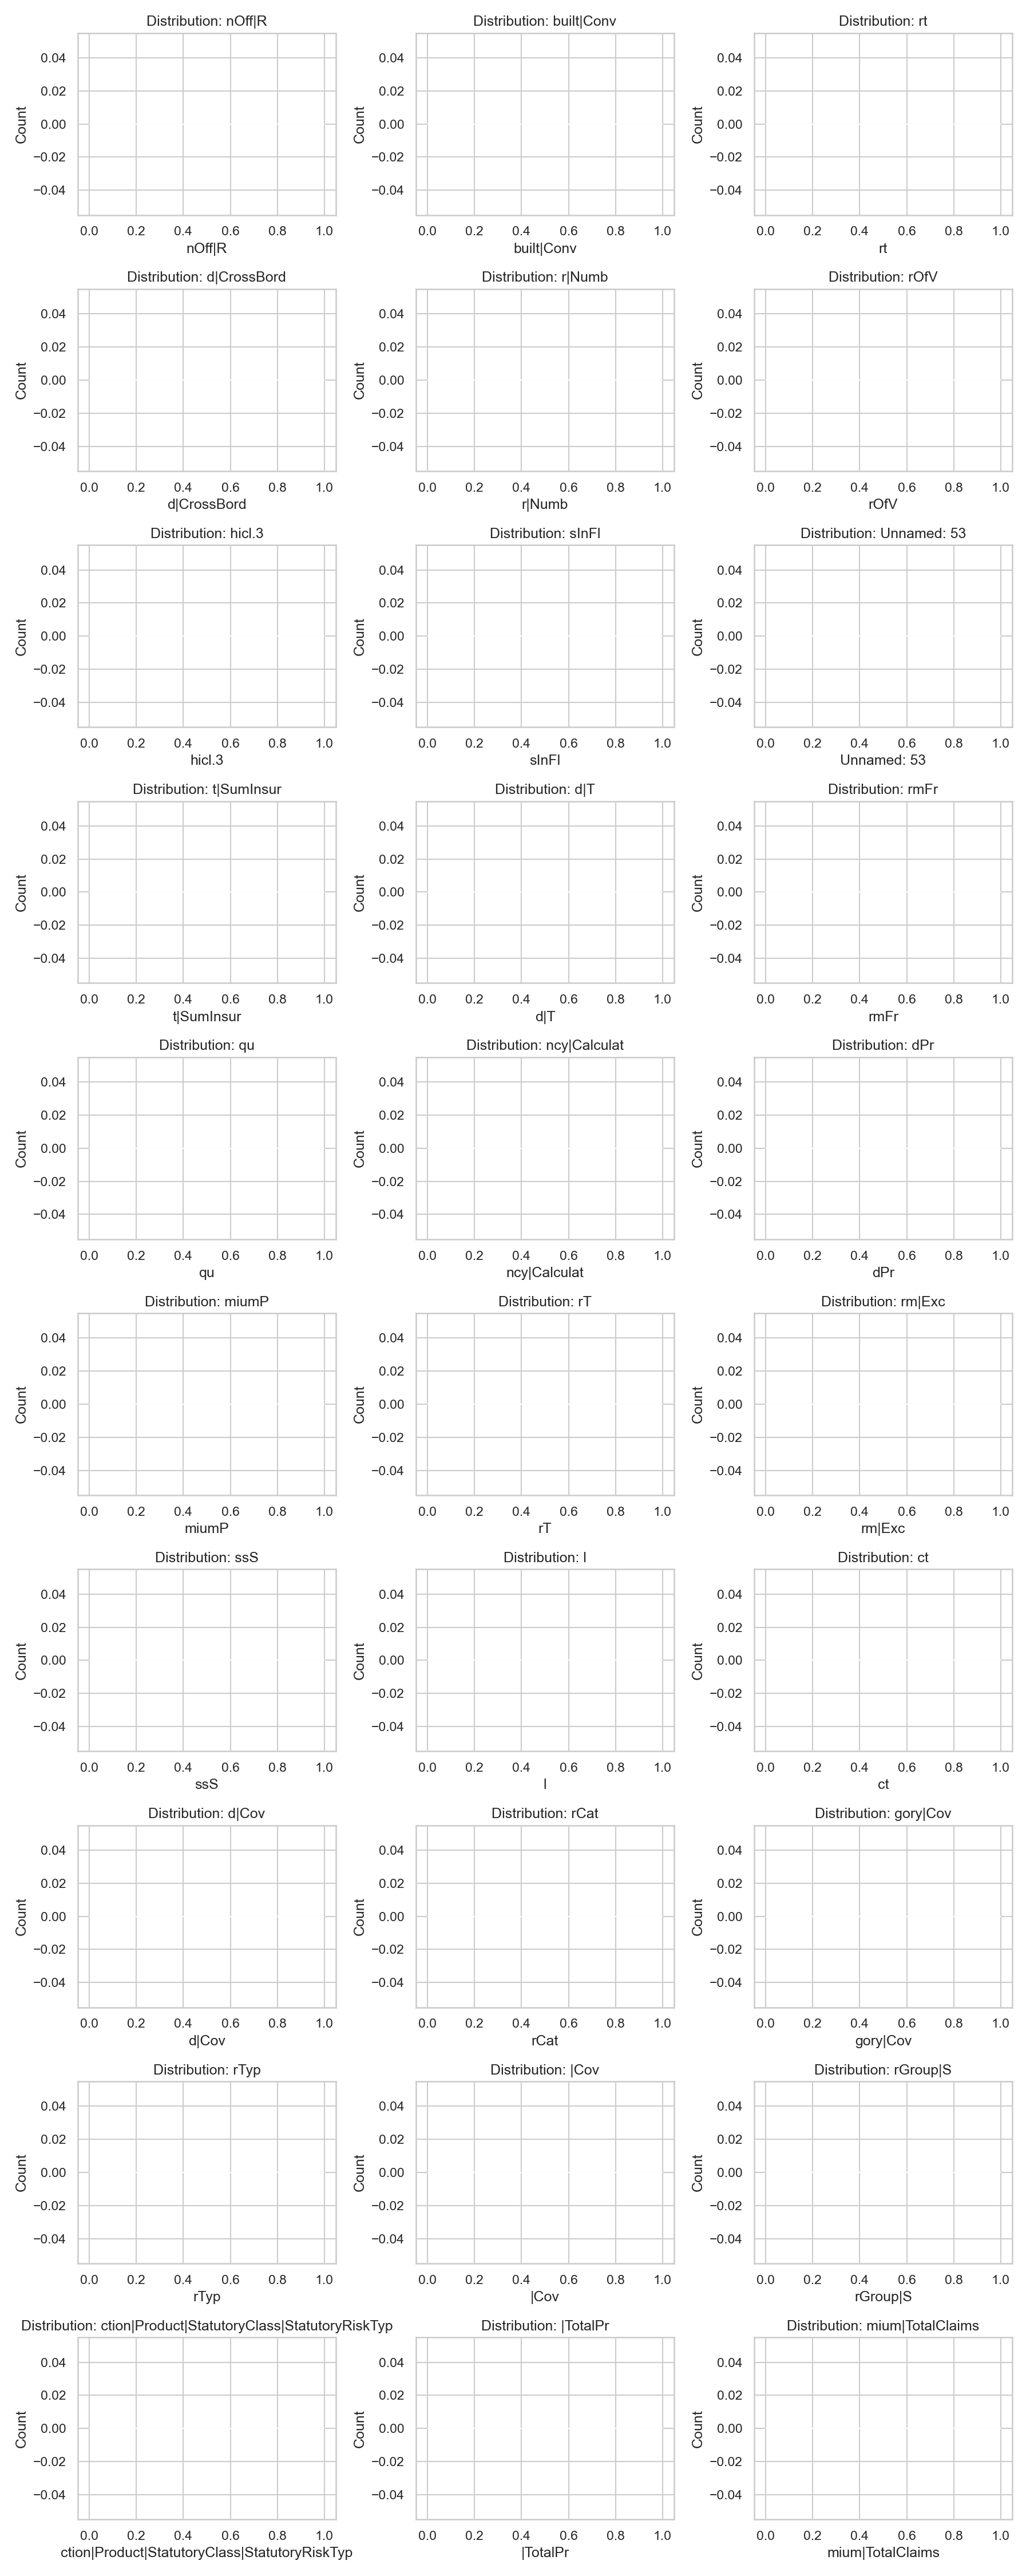

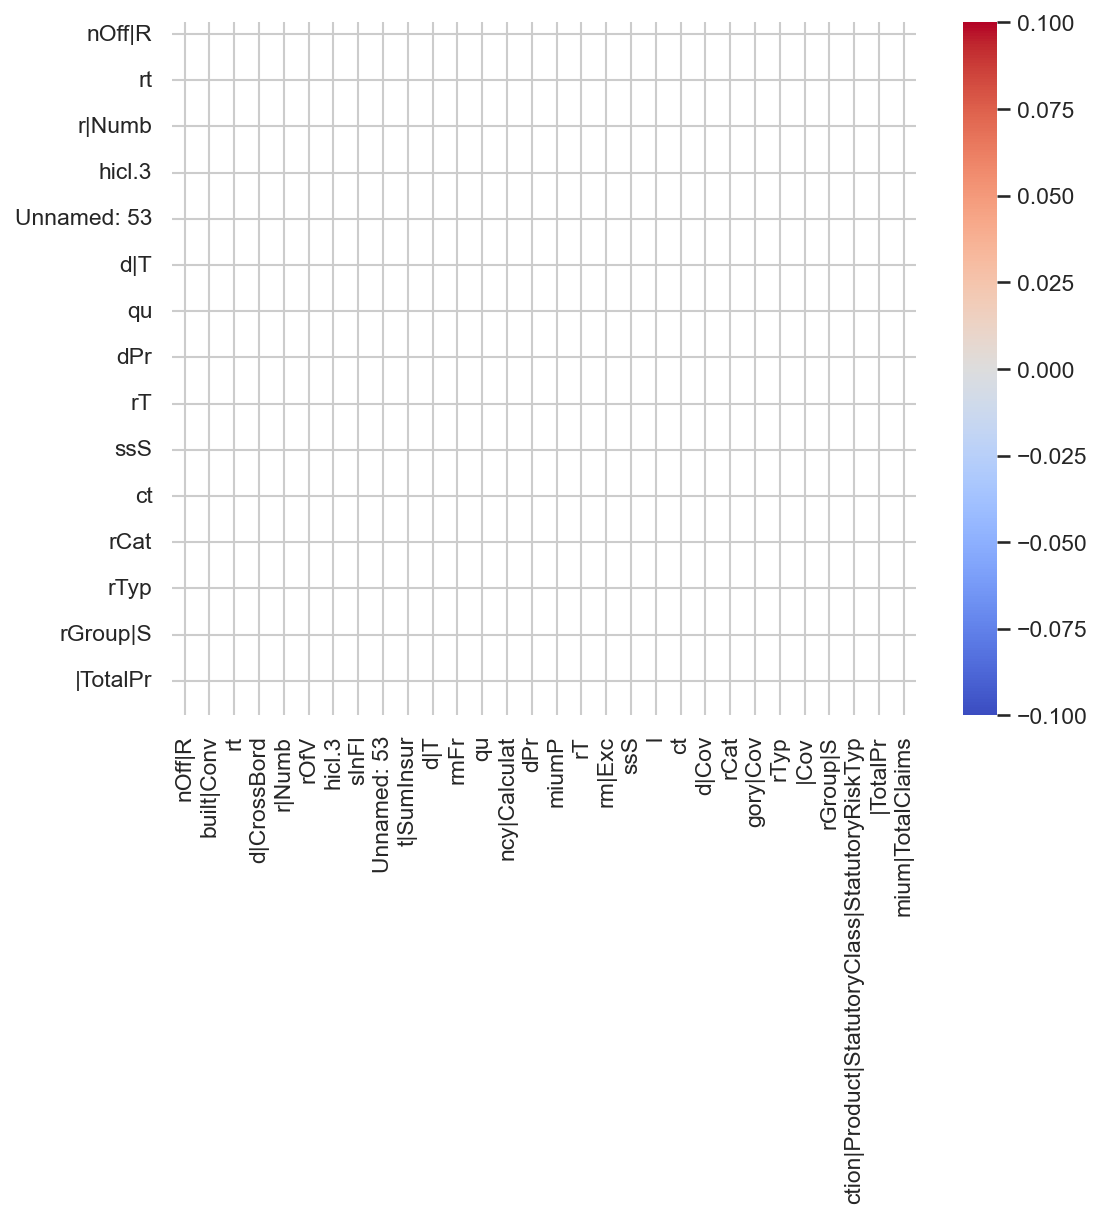

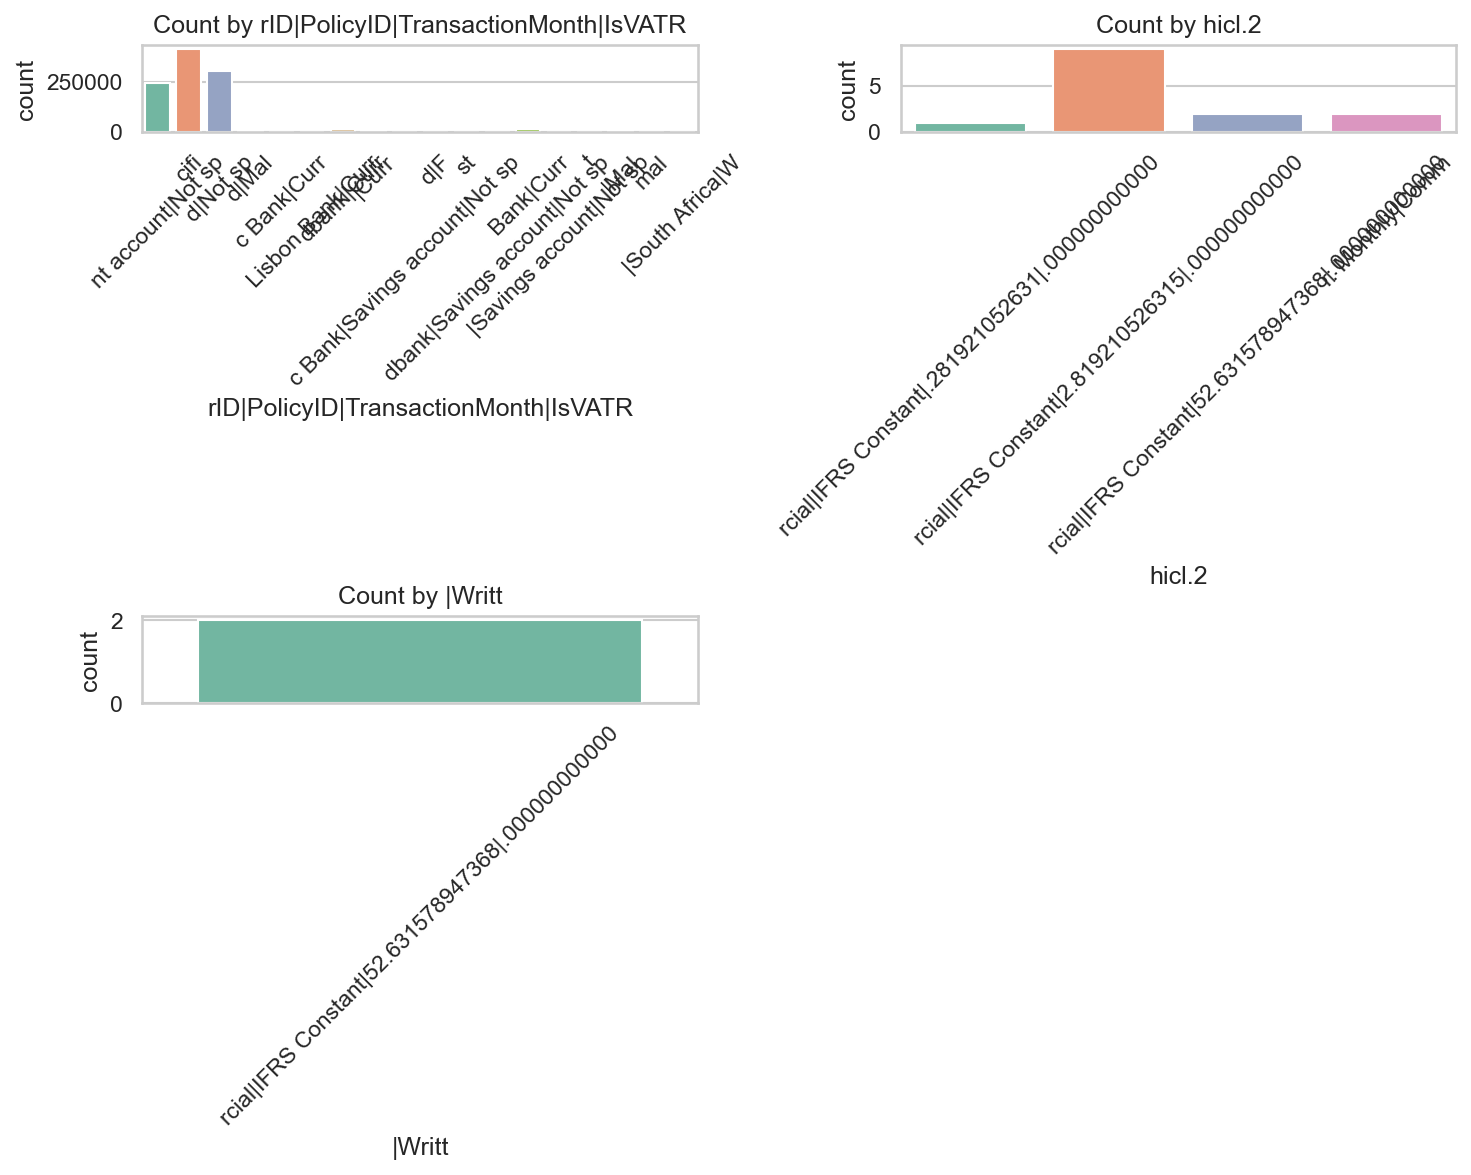

In [6]:
display(pd.read_csv(artifacts["summary"]).head())


if "distributions" in artifacts:
    display(Image(filename=str(artifacts["distributions"])))
if "charges_relationships" in artifacts:
    display(Image(filename=str(artifacts["charges_relationships"])))
if "corr_heatmap" in artifacts:
    display(Image(filename=str(artifacts["corr_heatmap"])))
if "categorical_counts" in artifacts:
    display(Image(filename=str(artifacts["categorical_counts"])))

